<a href="https://colab.research.google.com/github/intheblueside/machine_learning_projects/blob/main/student-grade/student_perf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Student Grade Prediction using Linear Regression

In [1]:
# import necessary lib
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('student-mat.csv', sep=';')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
# Data Cleaning.
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [7]:
# finding categorical data
categorical_features = (df.select_dtypes(include=['object']).columns.values)
categorical_features

array(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'], dtype=object)

In [8]:
# finding numerical data
numerical_features = df.select_dtypes(include = ['float64', 'int64']).columns.values
numerical_features

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

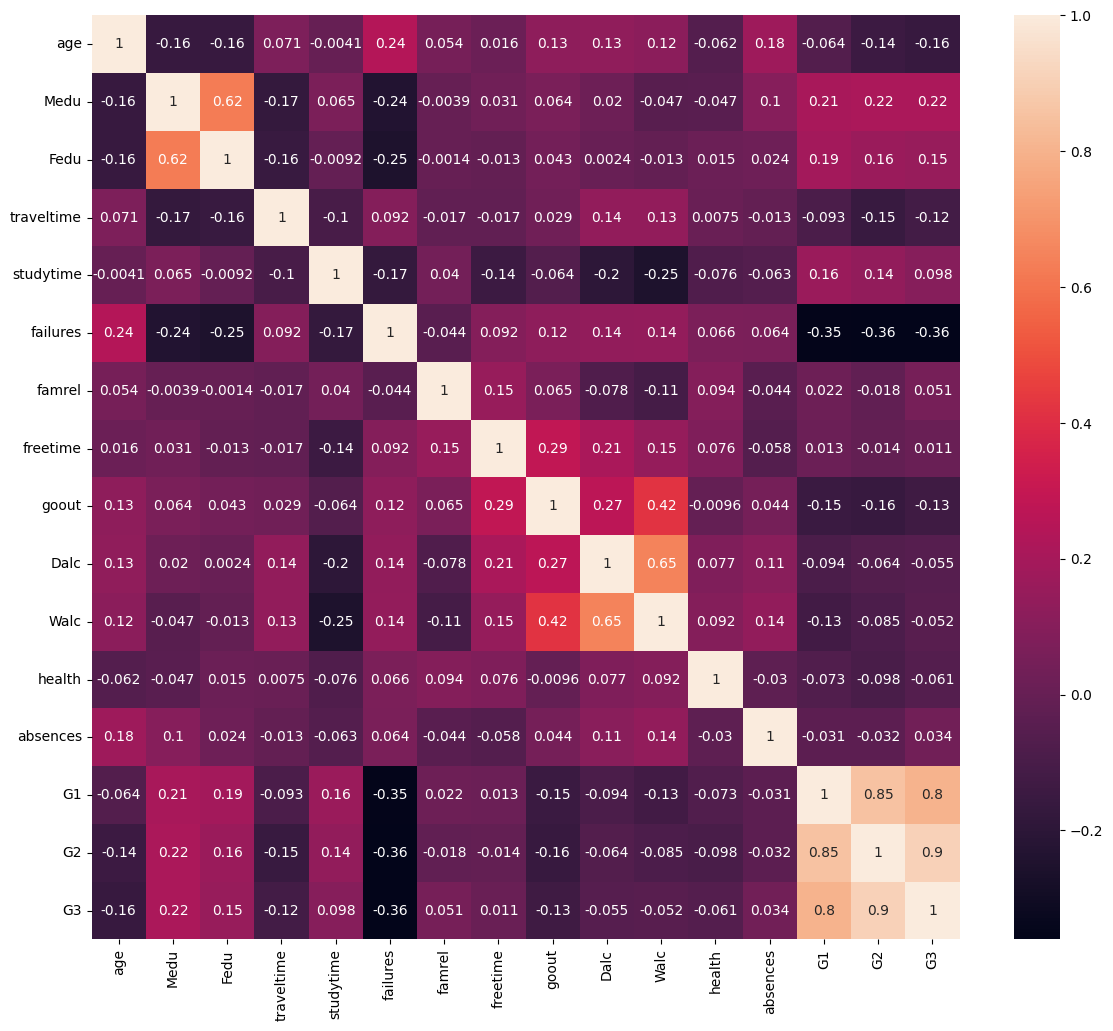

In [10]:
# exclude non numeric
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

Insights:
* there is a strong correlation grades G1, G2, G3
* there is a strong coorelation between student who consume alcohol (Walc) and go-out
* Medu and Fedu (mother's education and father's education) have no correlation with grades




In [11]:
# view all categorical/ object
object_col = [df.columns[index] for index, dtype in enumerate(df.dtypes) if dtype == 'object']
object_col

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [13]:
# view values in columns
for column in object_col:
    print(f"{column} : {df[column].unique()}")

school : ['GP' 'MS']
sex : ['F' 'M']
address : ['U' 'R']
famsize : ['GT3' 'LE3']
Pstatus : ['A' 'T']
Mjob : ['at_home' 'health' 'other' 'services' 'teacher']
Fjob : ['teacher' 'other' 'services' 'health' 'at_home']
reason : ['course' 'other' 'home' 'reputation']
guardian : ['mother' 'father' 'other']
schoolsup : ['yes' 'no']
famsup : ['no' 'yes']
paid : ['no' 'yes']
activities : ['no' 'yes']
nursery : ['yes' 'no']
higher : ['yes' 'no']
internet : ['no' 'yes']
romantic : ['no' 'yes']


In [14]:
# EDA

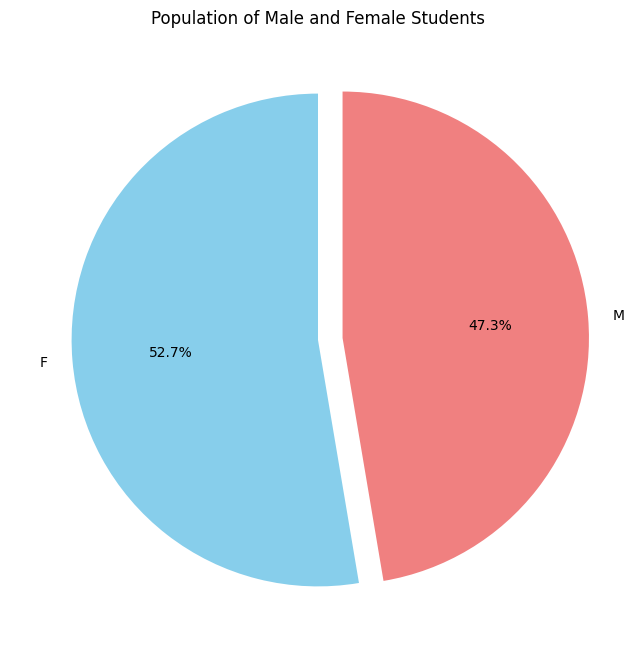

In [16]:
# male vs female students population
plt.figure(figsize=(8, 8))
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], explode=(0, 0.1), startangle=90)
plt.title('Population of Male and Female Students')
plt.ylabel('')
plt.show()

There are more female student data compared to male students

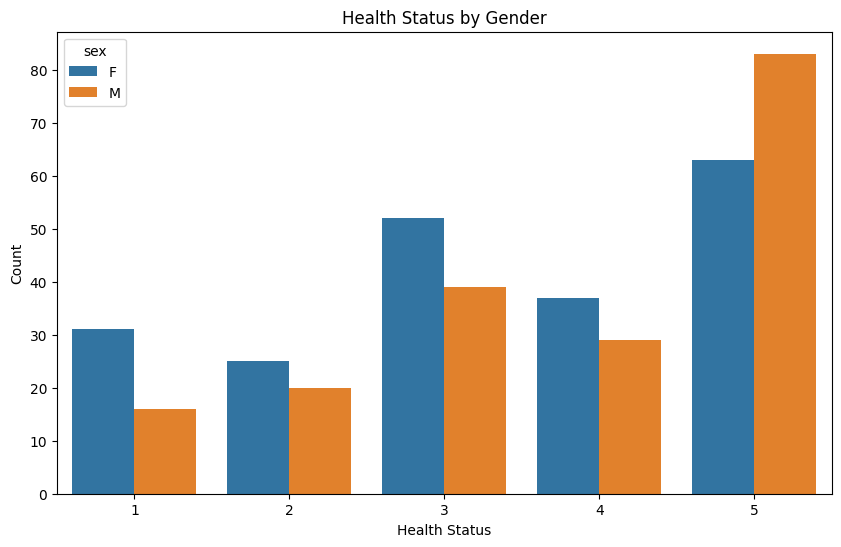

In [17]:
# health status in male vs female
plt.figure(figsize=(10, 6))
sns.countplot(x='health', hue='sex', data=df)
plt.title('Health Status by Gender')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.show()

<ipython-input-18-2ad60b6af7df>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='studytime', y='G3', data=df, ci=None, palette='Set2')
<ipython-input-18-2ad60b6af7df>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='studytime', y='G3', data=df, ci=None, palette='Set2')


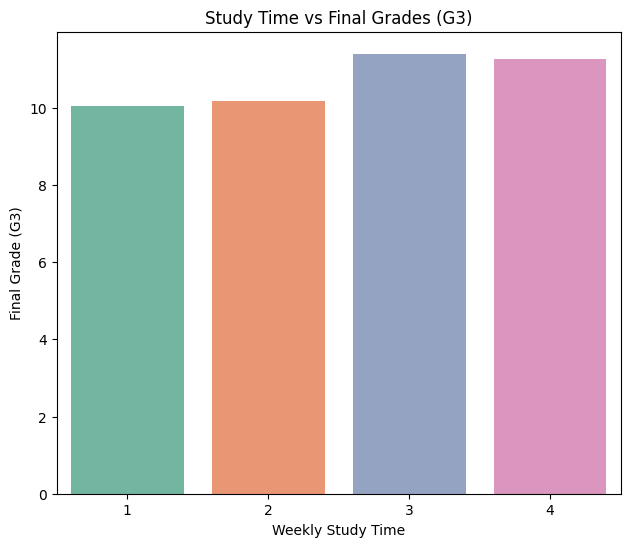

In [18]:
# study time vs final grade
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='studytime', y='G3', data=df, ci=None, palette='Set2')
plt.title('Study Time vs Final Grades (G3)')
plt.xlabel('Weekly Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()

<ipython-input-21-8ff3f61958a5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='activities', y='G3', data=df, palette='Set2')


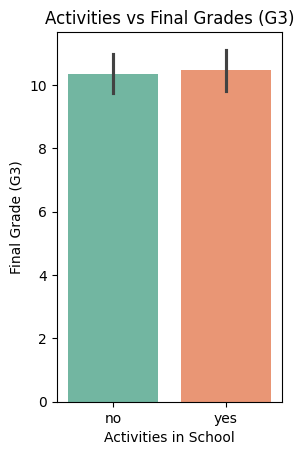

In [21]:
# activities and final grades
plt.subplot(1, 2, 2)
sns.barplot(x='activities', y='G3', data=df, palette='Set2')
plt.title('Activities vs Final Grades (G3)')
plt.xlabel('Activities in School')
plt.ylabel('Final Grade (G3)')
plt.show()

In [22]:
# modelling
# import necessary lib

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline

In [23]:
# first lets convert all labels to be in numeric
encoder = LabelEncoder()

for column in object_col:
    df[column] = encoder.fit_transform(df[column])

In [24]:
df.dtypes

school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [25]:
# we will be predicting G3 so lets remove G3 from the data in X
y = df['G3']
X = df.drop('G3', axis = 1)

In [26]:
# so the value for y is all of G3
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [27]:
# and the value of x is the remaining except G3
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,0,5,5,4,4,5,4,11,9,9
391,1,1,17,1,1,1,3,1,3,3,...,0,2,4,5,3,4,2,3,14,16
392,1,1,21,0,0,1,1,1,2,2,...,0,5,5,3,3,3,3,3,10,8
393,1,1,18,0,1,1,3,2,3,2,...,0,4,4,1,3,4,5,0,11,12


In [28]:
# feature standarization

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [29]:
# spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

In [30]:
# Linear Regression

lr = LinearRegression()

In [31]:
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
print(f"Model score with LR : {lr.score(X_test, y_test)}")

Model score with LR : 0.7393886724916015


In [34]:
y_pred = lr.predict(X_test)

In [43]:
# Store scores in a dict
Scores_ml = {}
Scores_ml['Linear Regression'] = np.round(lr.score(X_test,y_test),3)

In [38]:
# SVM
SVM_model = svm.SVC(kernel= "linear", C= 5.0, random_state=23)

In [39]:
SVM_model.fit(X_train, y_train)

SVC(C=5.0, kernel='linear', random_state=23)

In [40]:
print(f"Model score with SVM : {SVM_model.score(X_test, y_test)}")

Model score with SVM : 0.2773109243697479


In [42]:
y_pred = SVM_model.predict(X_test)

In [44]:
Scores_ml['SVM'] = np.round(SVM_model.score(X_test,y_test),3)

In [45]:
# classification report with SVM
classification_report_result = classification_report(y_test, y_pred)

print('\nClassification Report:')
print(classification_report_result)


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.73      0.59        11
           5       0.00      0.00      0.00         2
           6       0.40      0.50      0.44         4
           7       0.00      0.00      0.00         3
           8       0.27      0.50      0.35         8
           9       0.00      0.00      0.00        11
          10       0.31      0.28      0.29        18
          11       0.33      0.25      0.29        16
          12       0.25      0.18      0.21        11
          13       0.50      0.20      0.29        10
          14       0.20      0.25      0.22         8
          15       0.25      0.60      0.35         5
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         4
          18       0.33      0.33      0.33         3
          19       0.00      0.00      0.00         2

    accuracy                           0.28       119
  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
# random forest
rf = RandomForestClassifier(n_estimators=100, random_state=23)

In [47]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=23)

In [48]:
print(f"Model score with Random Forest : {rf.score(X_test, y_test)}")

Model score with Random Forest : 0.3949579831932773


In [49]:
y_pred = rf.predict(X_test)

In [50]:
Scores_ml['Random Forest'] = np.round(rf.score(X_test,y_test),3)

In [51]:
# classification report with RF
classification_report_result = classification_report(y_test, y_pred)

print('\nClassification Report:')
print(classification_report_result)


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           5       0.00      0.00      0.00         2
           6       0.60      0.75      0.67         4
           7       0.00      0.00      0.00         3
           8       0.27      0.38      0.32         8
           9       0.50      0.09      0.15        11
          10       0.41      0.67      0.51        18
          11       0.50      0.44      0.47        16
          12       0.20      0.09      0.13        11
          13       0.29      0.20      0.24        10
          14       0.43      0.38      0.40         8
          15       0.17      0.60      0.26         5
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         4
          18       1.00      0.67      0.80         3
          19       0.00      0.00      0.00         2

    accuracy                           0.39       119
  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: ylabel='Accuracy'>

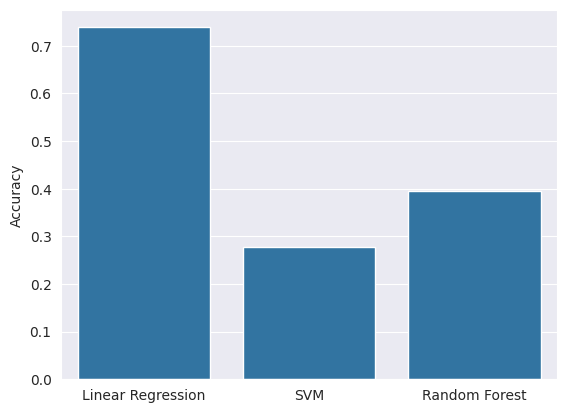

In [52]:
# compare across models
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.Accuracy)